### This file read temperature and humidity data in London from Nasa and visualize the result as time series

In [80]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [81]:
df = pd.read_excel('Nasa_UK_21-22.xlsm', sheet_name='Nasa_UK_21-22')

In [82]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

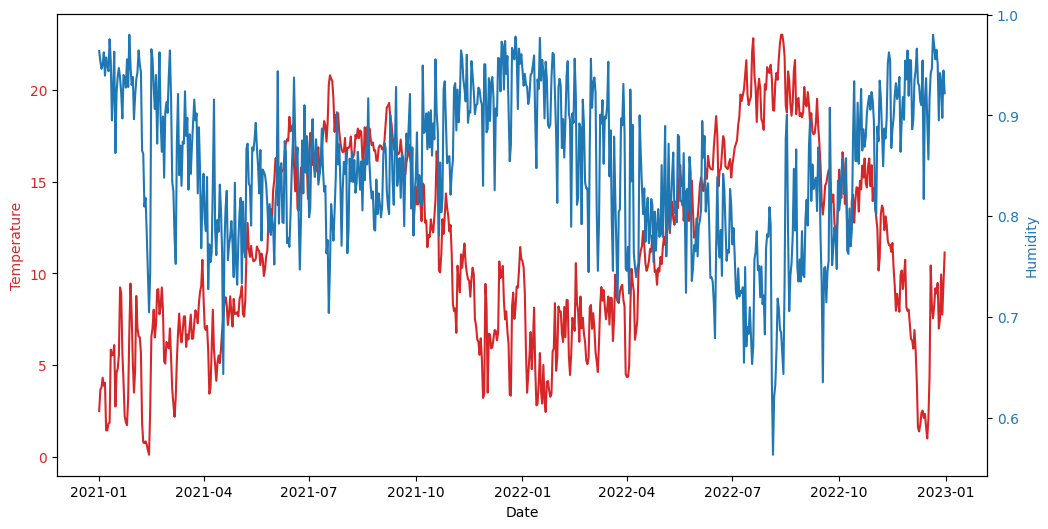

In [83]:
fig, ax = plt.subplots(figsize=(12,6))
color = 'tab:red'
ax.plot(df.index, df['TS'], color=color)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature', color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2=ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('Humidity', color=color)
ax2.plot(df.index, df['RH2M'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.show()

In [84]:
# Extracting the relevant columns
data_for_clustering = df[['TS', 'RH2M']]

In [85]:
# Applying k-means to the dataset with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_for_clustering)

In [86]:
# Adding the cluster labels to the data
data_for_clustering['Cluster'] = cluster_labels

/var/folders/mt/9xr9vc1j62s6yvdx48jm0xlr0000gn/T/ipykernel_4649/3899858967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Cluster'] = cluster_labels


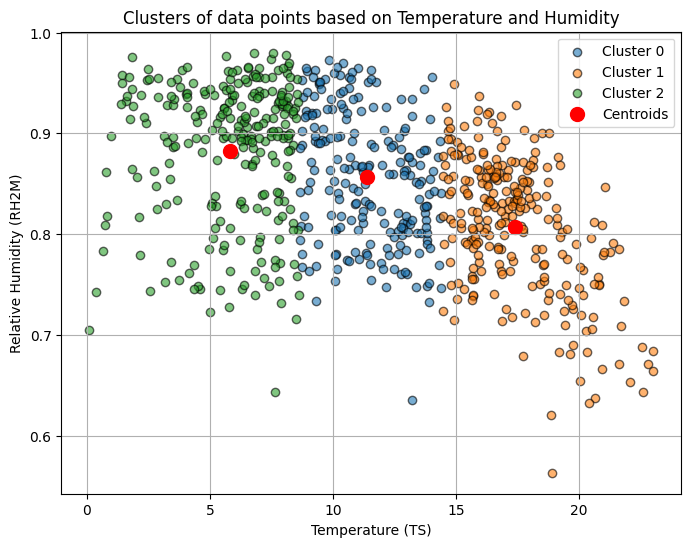

In [87]:
# Visualizing the clustered data
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_data = data_for_clustering[data_for_clustering['Cluster'] == i]
    plt.scatter(cluster_data['TS'], cluster_data['RH2M'], label=f'Cluster {i}', alpha=0.6, edgecolors='black')

# Marking the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

plt.title('Clusters of data points based on Temperature and Humidity')
plt.xlabel('Temperature (TS)')
plt.ylabel('Relative Humidity (RH2M)')
plt.legend()
plt.grid(True)
plt.show()

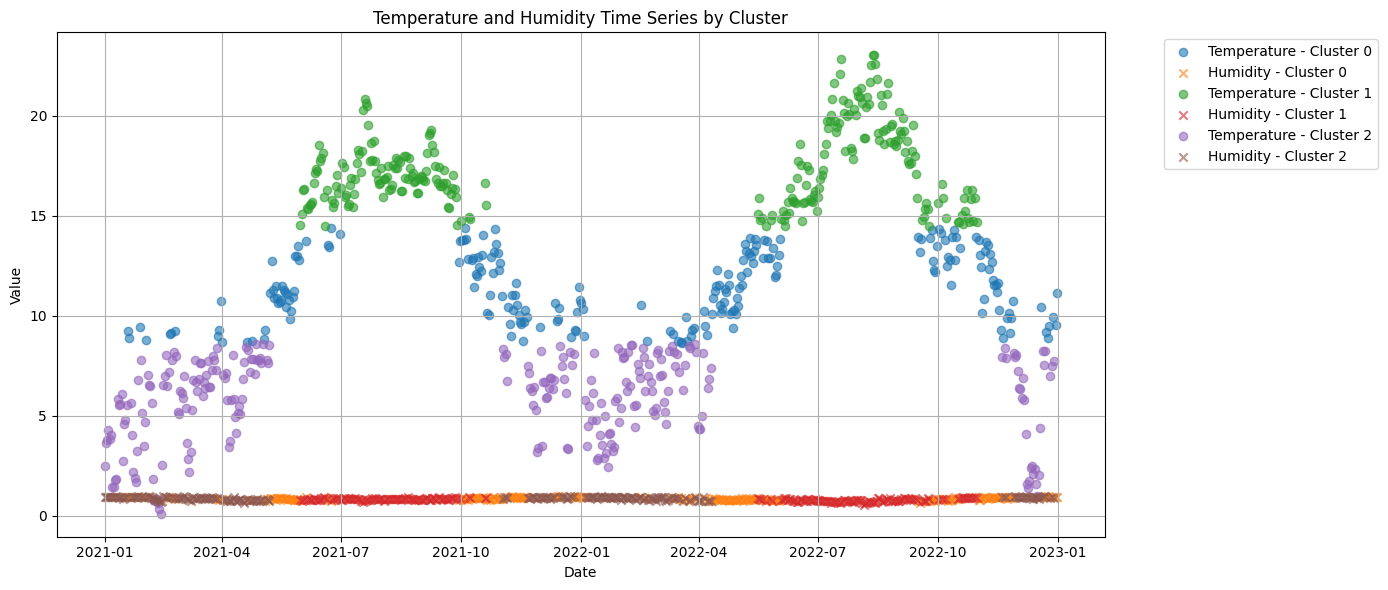

In [88]:
# Load the data
nasa_data = pd.read_excel('Nasa_UK_21-22.xlsm', sheet_name='Nasa_UK_21-22')

# Extracting the relevant columns for clustering
data_for_clustering = nasa_data[['TS', 'RH2M']]

# Applying k-means to the dataset with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_for_clustering)

# Adding the cluster labels and date column to the original data frame
nasa_data['Cluster'] = cluster_labels

# Converting the 'Date' column to datetime format
nasa_data['Date'] = pd.to_datetime(nasa_data['Date'], errors='coerce')

# Sorting the data by date
nasa_data_sorted = nasa_data.sort_values(by='Date')

# Creating a time series plot with date on the x-axis
plt.figure(figsize=(14, 6))

for i in range(3):
    cluster_data = nasa_data_sorted[nasa_data_sorted['Cluster'] == i]
    plt.scatter(cluster_data['Date'], cluster_data['TS'], label=f'Temperature - Cluster {i}', alpha=0.6)
    plt.scatter(cluster_data['Date'], cluster_data['RH2M'], label=f'Humidity - Cluster {i}', alpha=0.6, marker='x')

plt.title('Temperature and Humidity Time Series by Cluster')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


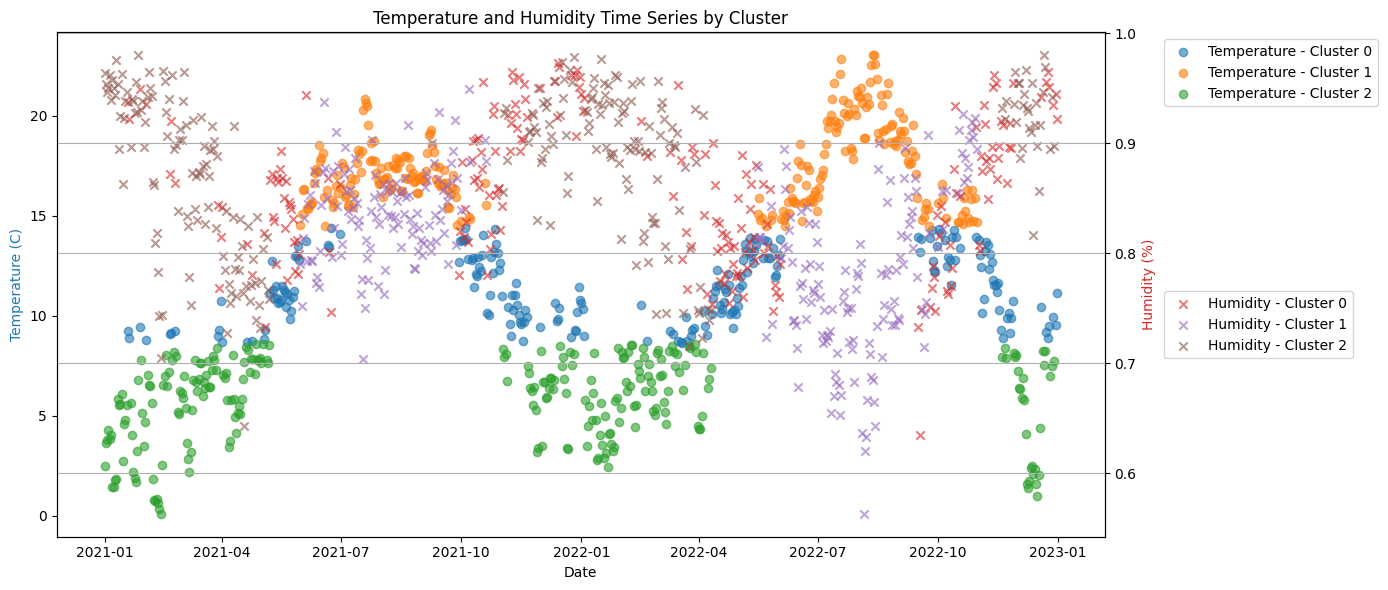

In [91]:
# Load the data
nasa_data = pd.read_excel('Nasa_UK_21-22.xlsm', sheet_name='Nasa_UK_21-22')

# Extracting the relevant columns for clustering
data_for_clustering = nasa_data[['TS', 'RH2M']]

# Applying k-means to the dataset with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_for_clustering)

# Adding the cluster labels and date column to the original data frame
nasa_data['Cluster'] = cluster_labels

# Creating a time series plot with date on the x-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

for i in range(3):
    cluster_data = nasa_data_sorted[nasa_data_sorted['Cluster'] == i]
    ax1.scatter(cluster_data['Date'], cluster_data['TS'], label=f'Temperature - Cluster {i}', alpha=0.6)
    ax2.scatter(cluster_data['Date'], cluster_data['RH2M'], label=f'Humidity - Cluster {i}', alpha=0.6, marker='x', color='C'+str(i+3))

ax1.set_title('Temperature and Humidity Time Series by Cluster')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (C)', color='tab:blue')
ax2.set_ylabel('Humidity (%)', color='tab:red')  # we already handled the x-label with ax1
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.5))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
plt.show()
